<a href="https://colab.research.google.com/github/vaishnaviS302004/machine-learning-lab/blob/main/lwr1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))

    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.array([1, x_query[0]])

    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta


In [14]:
db = pd.read_csv('housing.csv')
db.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
X = db[['housing_median_age']].values
Y = db['median_house_value'].values

In [17]:
X_Query = np.array([41]); # Predicting for this input
tau = 0.1 #bandwidth parameter
y_query = locally_weighted_regression(X, Y, tau, X_Query)
print(f"Predicted median house value for a house with 30 years old: {y_query}")

Predicted median house value for a house with 30 years old: 197253.77364864876


Predicted median house value for housing median age 10: 193923.82789030776
Predicted median house value for housing median age 20: 198521.40640040388
Predicted median house value for housing median age 30: 205106.16873237348
Predicted median house value for housing median age 40: 214431.02664171837
Predicted median house value for housing median age 50: 242024.36162520997


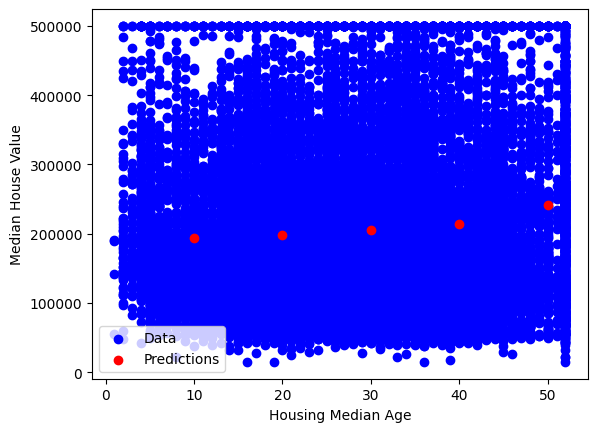

In [18]:
# Predict for multiple x_query values
x_queries = np.array([10, 20, 30, 40, 50])  # Replace with your desired query points
predictions = []

for x_query in x_queries:
    x_query = np.array([x_query])  # Ensure x_query is a 1D array
    y_query = locally_weighted_regression(X, Y, tau=10, x_query=x_query)
    predictions.append(y_query)
    print(f"Predicted median house value for housing median age {x_query[0]}: {y_query}")

# Optionally, visualize the predictions
plt.scatter(X, Y, color='blue', label='Data')
plt.scatter(x_queries, predictions, color='red', label='Predictions')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.legend()
plt.show()

In [19]:
import pandas as pd
import numpy as np

def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))

    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.array([1, x_query[0]])

    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta

# Load the dataframe
db = pd.read_csv('housing.csv')

# Define X and Y
X = db[['housing_median_age']].values
Y = db['median_house_value'].values

# Define the query point and bandwidth
X_Query = np.array([41])  # Predicting for this input
tau = 0.1  # bandwidth parameter

# Call the locally weighted regression function
y_query = locally_weighted_regression(X, Y, tau, X_Query)
print(f"Predicted median house value for a house with 30 years old: {y_query}")

Predicted median house value for a house with 30 years old: 197253.77364864876


Predicted median house value for the given features: 162976.12402046582


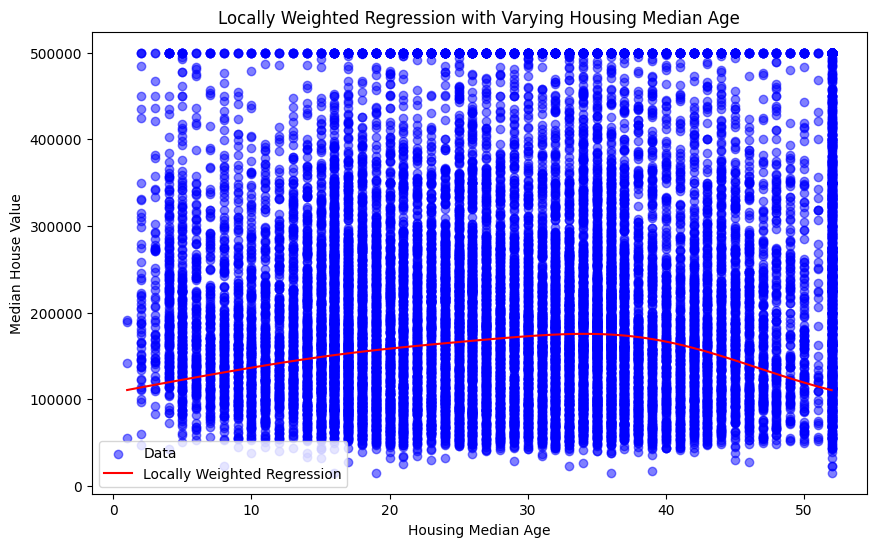

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))

    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    # Fix: Augment x_query with 1 and keep its original dimensions
    x_query_augmented = np.insert(x_query, 0, 1)

    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y

    return x_query_augmented @ theta

# Load the dataframe and select features
db = pd.read_csv('housing.csv')
features = ['housing_median_age', 'total_rooms', 'population']
X = db[features].values
Y = db['median_house_value'].values

# Define the query point and bandwidth
X_Query = np.array([41, 1500, 800])  # Example query point
tau = 10  # bandwidth parameter

# Call the locally weighted regression function for the query point
y_query = locally_weighted_regression(X, Y, tau, X_Query)
print(f"Predicted median house value for the given features: {y_query}")

# Visualization: Varying 'housing_median_age' while keeping other features constant
# Define a range of values for 'housing_median_age'
age_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)  # 100 points

# Create query points by varying 'housing_median_age' and keeping others constant
query_points = np.array([(age, X_Query[1], X_Query[2]) for age in age_range])

# Make predictions for each query point
predictions = [locally_weighted_regression(X, Y, tau, query_point) for query_point in query_points]

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', alpha=0.5, label='Data')  # Scatter plot of original data
plt.plot(age_range, predictions, color='red', label='Locally Weighted Regression')  # Regression line
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.title('Locally Weighted Regression with Varying Housing Median Age')
plt.legend()
plt.show()

Mean Squared Error: 2900.1445278347464


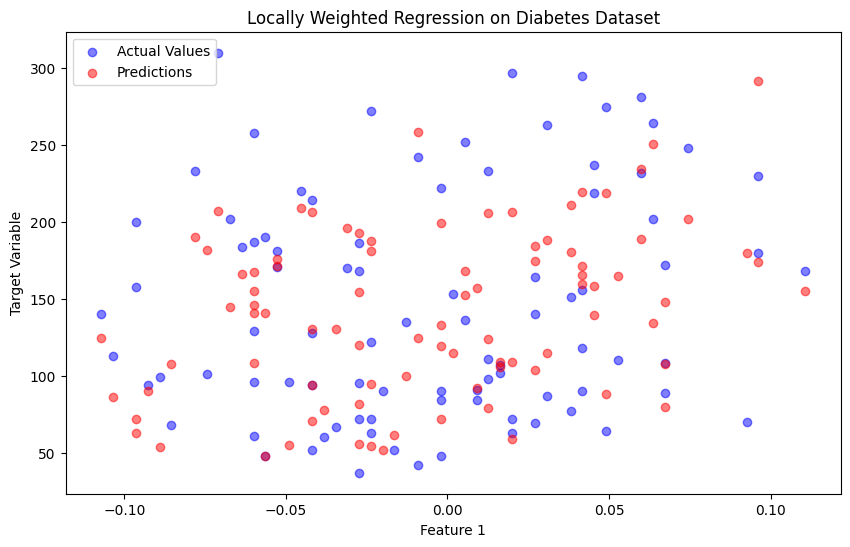

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

def locally_weighted_regression(X, Y, tau, x_query):
    """
    Performs locally weighted regression.

    Args:
        X: The feature matrix.
        Y: The target variable.
        tau: The bandwidth parameter.
        x_query: The query point for prediction.

    Returns:
        The predicted value for the query point.
    """
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.insert(x_query, 0, 1)
    W = np.diag(weights)
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta

# Load the Diabetes dataset
diabetes = load_diabetes()
X, Y = diabetes.data, diabetes.target

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the bandwidth parameter
tau = 10

# Make predictions on the test set
predictions = []
for x_query in X_test:
    y_query = locally_weighted_regression(X_train, Y_train, tau, x_query)
    predictions.append(y_query)

# Evaluate the model (example: using Mean Squared Error)
mse = np.mean((predictions - Y_test)**2)
print(f"Mean Squared Error: {mse}")

# Visualization (example: plotting predictions vs actual values for a single feature)
feature_index = 0  # Choose a feature index to visualize
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, feature_index], Y_test, color='blue', alpha=0.5, label='Actual Values')
plt.scatter(X_test[:, feature_index], predictions, color='red', alpha=0.5, label='Predictions')
plt.xlabel(f"Feature {feature_index + 1}")
plt.ylabel("Target Variable")
plt.title("Locally Weighted Regression on Diabetes Dataset")
plt.legend()
plt.show()